In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import seaborn as sns

# I have an excel dataset with 95 Parrot Duets, each duet is like a sentance with a varying number and order of words. The words are called "signals" I want to explore the number of signals, and look for any patterns in the order of signals. Patterns would be like if certain signals tend to always be paired together, or if a certain signal is usually starting or ending the duet 

In [2]:
file = '/Users/abigailpozulp/Desktop/Duets.xlsx'
Duets = pd.read_excel(file)
Duets.head(3)

# the rows are individual duets 1-95 and the columns are the signal order, first to sixteenth, from n1-n16,
# some duets are not 15 signals long, and therefore have lots of NaN

n1     n2      n3      n4      n5     n6     n7     n8   n9  n10  \
d1    preet  scraw  yoohoo  yeehaw     caw    NaN    NaN    NaN  NaN  NaN   
d2     quip  trill   chirp   chirp  yoohoo   bray    NaN    NaN  NaN  NaN   
d3  whurrop  hello   hello   chuff     raw  chuff  chuff  chuff  woo  ahh   

     n11  n12  n13  n14  n15  
d1   NaN  NaN  NaN  NaN  NaN  
d2   NaN  NaN  NaN  NaN  NaN  
d3  honk  NaN  NaN  NaN  NaN

In [3]:
type(Duets)

#this identifys the dataset

pandas.core.frame.DataFrame

In [4]:
Duets.shape

#shows me the shape of my dataframe

(95, 15)

In [5]:
print(Duets.info())
# shows me how many NaN are in each column
 

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, d1 to d95
Data columns (total 15 columns):
n1     95 non-null object
n2     95 non-null object
n3     95 non-null object
n4     89 non-null object
n5     55 non-null object
n6     43 non-null object
n7     31 non-null object
n8     19 non-null object
n9     12 non-null object
n10    9 non-null object
n11    5 non-null object
n12    2 non-null object
n13    2 non-null object
n14    2 non-null object
n15    1 non-null object
dtypes: object(15)
memory usage: 11.9+ KB
None


In [6]:
print(Duets['n1'].unique())
# This are all the possible first signals

['preet' 'quip' 'whurrop' 'chuff' 'garble' 'caw' 'oi' 'chirp' 'trill'
 'burr' 'yeehaw' 'brill' 'prawn' 'wop' 'squee' 'scraw' 'scream' 'purr'
 'quill' 'browk' 'bray']


In [7]:
print(Duets.groupby('n1').size())
# this shows which signal and how many times it was used as a first signal to the duet

n1
bray        1
brill       2
browk       2
burr        9
caw         4
chirp      18
chuff      14
garble      2
oi          2
prawn       2
preet       4
purr        1
quill       4
quip        7
scraw       1
scream      2
squee       1
trill      12
whurrop     2
wop         1
yeehaw      4
dtype: int64


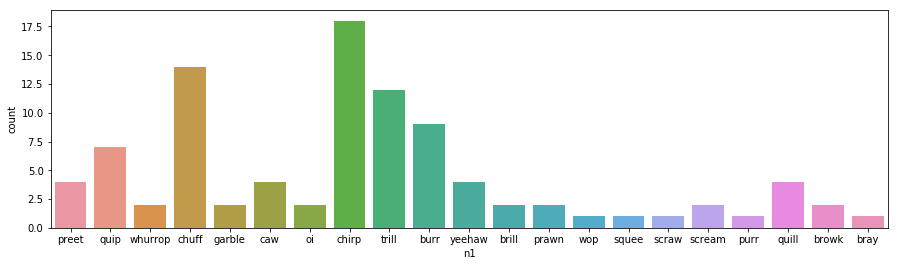

In [8]:
import seaborn as sns
import copy
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(Duets['n1'],label="Count")
plt.show()
#plot of how many times each signal type was used to begin a duet

In [9]:
# note that some duets are never used first. these would be 

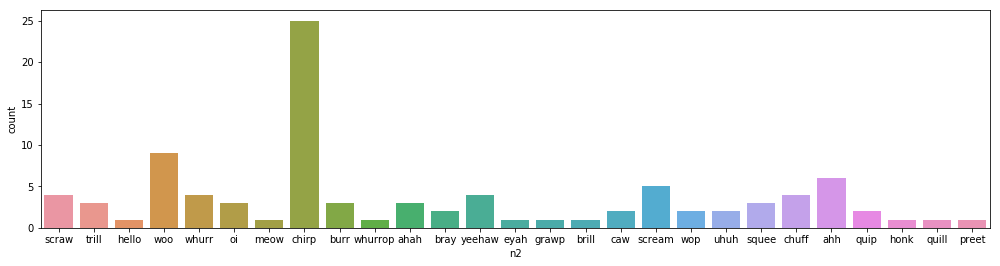

In [10]:
f, ax = plt.subplots(figsize=(17, 4))
sns.countplot(Duets['n2'],label="Count")
plt.show()
#plot of how many times each signal type was used as the second signal of the duet

# A dataframe of categorical, not numerical, data is hard to work with, to make the data into a better format I will use python's built-in language processer

# First I will make each duet into an individual string 

## I had to add the 'start' and 'end' to each of them to act as placemarkers because later on I will be adding the strings together and I want thier original order to be preserved

In [11]:
p1 = "start preet scraw yoohoo yeehaw caw end"         
p2 = 'start quip trill chirp chirp yoohoo bray end'        
p3 = 'start whurrop hello hello caw raw caw caw caw woo ahh honk end'   
p4 = 'start caw woo ahh honk end'          
p5 = 'start caw woo ahh honk end' 
p6 = 'start caw woo ahh honk end'          
p7 = 'start preet scraw yoohoo yeehaw caw end'         
p8 = 'start preet scraw yoohoo whurr caw oi oi oi end'      
p9 = 'start caw woo ahh honk end'          
p10 = 'start caw woo ahh honk end'

p11 = 'start caw whurr ahh honk end'          
p12 = 'start caw whurr ahh honk end'          
p13 = 'start caw woo ahh honk end'          
p14= 'start garble trill caw raw end'          
p15= 'start caw woo ahh honk end'          
p16= 'start caw whurr ahh honk end'          
p17= 'start caw whurr ahh honk end'          
p18= 'start oi oi chirp trill ahah oi oi oi hello hello end'    
p19= 'start chirp meow yoohoo whurr end'          
p20= 'start chirp chirp yoohoo bray caw meow end'   
p21= 'start caw chirp chirp ahah chirp bray caw eyah preet quip eyah end'   
p22= 'start chirp burr chirp brill ahah end'         
p23= 'start chirp whurrop eyah ahah eyah ahah end'        
p24= 'start chirp chirp burr chirp brill ahah caw yeehaw yeehaw meow end'    
p25= 'start trill burr scream caw yeehaw yeehaw bray caw meow end'     
p26= 'start burr chirp brill ahah end'          
p27= 'start burr chirp brill ahah end'          
p28= 'start garble ahah whurrop eyah end'          
p29= 'start trill chirp chirp scream yeehaw bray caw end'       
p30= 'start chirp bray caw oi end'          
p31= 'start caw yeehaw chirp yeehaw whurrop caw end'        
p32= 'start trill chirp scream caw yeehaw yeehaw end'        
p33= 'start chirp eyah eyah eyah bray caw grawp end'       
p34= 'start yeehaw grawp scream scraw yoohoo bray caw meow end'      
p35= 'start chirp chirp oi oi oi oi preet yeet yoohoo end'     
p36= 'start trill chirp scream caw yeehaw yeehaw bray caw meow end'     
p37= 'start chirp burr chirp brill ahh end'         
p38= 'start burr chirp brill ahh end'          
p39= 'start burr chirp brill ahh end'          
p40= 'start chirp brill burr chirp brill ahah eyah ahah eyah meow end'    
p41= 'start burr chirp brill ahah end'          
p42= 'start trill chirp trill chirp brill caw chirp eyah end'      
p43= 'start brill caw chirp bray end'          
p44= 'start chirp scream caw yeehaw yeehaw bray ahh meow end'      
p45= 'start chirp scream yeehaw bray buzz meow end'        
p46= 'start prawn chirp scream caw yeehaw caw meow end'       
p47= 'start caw woo ahh honk end'          
p48= 'start oi oi preet scraw yoohoo yeehaw caw end'       
p49= 'start trill uhuh preet scraw yoohoo yeehaw caw end'       
p50= 'start chirp squee yeehaw bray caw end'         
p51= 'start quip scream caw yeehaw yeehaw bray caw meow end'      
p52= 'start quip scream caw yeehaw yeehaw bray buzz meow end'      
p53= 'start caw yeehaw yeehaw end'           
p54= 'start burr ahah whurrop sob end'          
p55= 'start squee caw chirp scraw yoohoo bray caw end'       
p56= 'start scraw yeehaw yeehaw garble grawp buzz end'        
p57= 'start yeehaw yeehaw yeehaw yeehaw bray buzz meow end'       
p58= 'start brill chirp brill ahh end'          
p59= 'start quip squee caw chirp yeet yoohoo bray caw end'      
p60= 'start scream caw yeehaw yeehaw bray end'         
p61= 'start trill chirp scream quip bray meow end'        
p62= 'start prawn chirp scream caw bray oi meow end'       
p63= 'start trill chirp scream bray end'          
p64= 'start trill chirp scream bray end'          
p65= 'start burr chirp brill ahah end'          
p66= 'start burr chirp brill ahah end'          
p67= 'start whurrop ahh meow caw end'          
p68= 'start trill oi oi oi preet scraw yoohoo end'       
p69= 'start quip quip quip oi chirp trill ahah eyah uhuh sob end'    
p70= 'start yeehaw ahh chirp whurrop yoohoo end'         
p71= 'start yeehaw ahh chirp whurrop yoohoo quip oi quip bray oi garble ahah meow scraw end'
p72= 'start quip chirp chirp whurrop quip bray scraw whurrop scraw caw scraw yeehaw grawp chirp end'
p73= 'start purr quip quip quip yeehaw grawp end'        
p74= 'start caw chirp scraw yoohoo bray caw end'        
p75= 'start chirp honk caw eyah end'                  
p76= 'start brill ahh eyah end'           
p77= 'start brill ahh eyah sob end'          
p78= 'start quip uhuh preet scraw yoohoo yeehaw caw end'       
p79= 'start preet scraw yoohoo yeehaw caw end'         
p80= 'start brill ahah woo sob end'          
p81= 'start brill ahh eyah sob end'          
p82= 'start caw woo ahh honk end'          
p83= 'start browk oi oi oi hello hello caw woo ahh hello honk end'   
p84= 'start browk brill ahah woo sob end'         
p85= 'start oi oi preet scraw yoohoo yeehaw caw end'       
p86= 'start chirp scream ahh end'           
p87= 'start chirp bray caw end'           
p88= 'start caw caw woo ahh honk caw end'        
p89= 'start bray caw grawp end'           
p90= 'start trill squee chirp scraw yoohoo end'         
p91= 'start trill chirp brill grawp eyah end'         
p92= 'start burr chirp brill end'           
p93= 'start scream caw yeehaw yeehaw bray caw meow end'       
p94= 'start chirp preet chirp brill caw eyah end'        
p95= 'start chirp trill sob caw woo end'  

#proof that each one is now a string
type(p95)

str

# now that I have 95 strings I need to "split" every individual signal in the string, which will give me 95 lists.

#### this is also known as to "tokenize" a string

In [12]:
p1 = p1.split(' ')
p2= p2.split(' ')
p3= p3.split(' ')
p4= p4.split(' ')
p5= p5.split(' ')
p6= p6.split(' ')
p7= p7.split(' ')
p8= p8.split(' ')
p9= p9.split(' ')
p10= p10.split(' ')
p11= p11.split(' ')
p12= p12.split(' ')
p13= p13.split(' ')
p14= p14.split(' ')
p15= p15.split(' ')
p16= p16.split(' ')
p17= p17.split(' ')
p18= p18.split(' ')
p19= p19.split(' ')
p20= p20.split(' ')
p21= p21.split(' ')
p22= p22.split(' ')
p23= p23.split(' ')
p24= p24.split(' ')
p25= p25.split(' ')
p26= p26.split(' ')
p27= p27.split(' ')
p28= p28.split(' ')
p29= p29.split(' ')
p30= p30.split(' ')
p31= p31.split(' ')
p32= p32.split(' ')
p33= p33.split(' ')
p34= p34.split(' ')
p35= p35.split(' ')
p36= p36.split(' ')
p37= p37.split(' ')
p38= p38.split(' ')
p39= p39.split(' ')
p40= p40.split(' ')
p41= p41.split(' ')
p42= p42.split(' ')
p43= p43.split(' ')
p44= p44.split(' ')
p45= p45.split(' ')
p46= p46.split(' ')
p47= p47.split(' ')
p48= p48.split(' ')
p49= p49.split(' ')
p50= p50.split(' ')
p51= p51.split(' ')
p52= p52.split(' ')
p53= p53.split(' ')
p54= p54.split(' ')
p55= p55.split(' ')
p56= p56.split(' ')
p57= p57.split(' ')
p58= p58.split(' ')
p59= p59.split(' ')
p60= p60.split(' ')
p61= p61.split(' ')
p62= p62.split(' ')
p63= p63.split(' ')
p64 =p64.split(' ')
p65= p65.split(' ')
p66= p66.split(' ')
p67= p67.split(' ')
p68= p68.split(' ')
p69 =p69.split(' ')
p70= p70.split(' ')
p71= p71.split(' ')
p72= p72.split(' ')
p73= p73.split(' ')
p74= p74.split(' ')
p75= p75.split(' ')
p76= p76.split(' ')
p77= p77.split(' ')
p78= p78.split(' ')
p79= p79.split(' ')
p80= p80.split(' ')
p81= p81.split(' ')
p82= p82.split(' ')
p83= p83.split(' ')
p84 =p84.split(' ')
p85= p85.split(' ')
p86= p86.split(' ')
p87= p87.split(' ')
p88= p88.split(' ')
p89= p89.split(' ')
p90= p90.split(' ')
p91= p91.split(' ')
p92= p92.split(' ')
p93= p93.split(' ')
p94= p94.split(' ')
p95= p95.split(' ') 

# proof that each string is now a list
type(p95)


list

In [13]:
type("preet")

str

# Now I want to calculate the frequency of each word transitioning to another word

#### the first way I'm trying is to this is to first, make a "window" function. (from the itertools cookbook) 
#### This gets me to a list of tuples of transitions (state1 to state2).



In [14]:
from itertools import islice

def window(seq, n=2):
    "Sliding window width n from seq.  From old itertools recipes."""
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

#### Then use a pandas groupby + value counts operation to get a transition matrix from each state1 to each state2

In [15]:
# the pairs will be made from a window of x lists
#I will try the list "p1"
# remember p1 = "start preet scraw yoohoo yeehaw caw end"   

pairs = pd.DataFrame(window(p1), columns=['state1', 'state2'])
counts = pairs.groupby('state1')['state2'].value_counts()
probs = (counts / counts.sum()).unstack()
#print my results as a dataframe

print(probs)

state2       caw       end     preet     scraw    yeehaw    yoohoo
state1                                                            
caw          NaN  0.166667       NaN       NaN       NaN       NaN
preet        NaN       NaN       NaN  0.166667       NaN       NaN
scraw        NaN       NaN       NaN       NaN       NaN  0.166667
start        NaN       NaN  0.166667       NaN       NaN       NaN
yeehaw  0.166667       NaN       NaN       NaN       NaN       NaN
yoohoo       NaN       NaN       NaN       NaN  0.166667       NaN


In [16]:
# to test whether these are correct I can compare it to p1:
    #"start preet scraw yoohoo yeehaw caw end"
# as you can see above, any beginning pair possibility is in the State 1 axis:
#     start preet scraw yoohoo yeehaw caw end
# and any ending pair possibility is in the State 2 axis
#    caw end preet scraw yeehaw yoohoo


# these are the correct probabilities for the transitions of the signals in p1. I wasn't sure how to get it to look at all the duets though. 
#### I decided to try adding them together

In [17]:
# adding the first 20 together

twentytest = (p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14+p15+p16+p17+p18+p19+p20+p21)

In [18]:
print(twentytest)

['start', 'preet', 'scraw', 'yoohoo', 'yeehaw', 'caw', 'end', 'start', 'quip', 'trill', 'chirp', 'chirp', 'yoohoo', 'bray', 'end', 'start', 'whurrop', 'hello', 'hello', 'caw', 'raw', 'caw', 'caw', 'caw', 'woo', 'ahh', 'honk', 'end', 'start', 'caw', 'woo', 'ahh', 'honk', 'end', 'start', 'caw', 'woo', 'ahh', 'honk', 'end', 'start', 'caw', 'woo', 'ahh', 'honk', 'end', 'start', 'preet', 'scraw', 'yoohoo', 'yeehaw', 'caw', 'end', 'start', 'preet', 'scraw', 'yoohoo', 'whurr', 'caw', 'oi', 'oi', 'oi', 'end', 'start', 'caw', 'woo', 'ahh', 'honk', 'end', 'start', 'caw', 'woo', 'ahh', 'honk', 'end', 'start', 'caw', 'whurr', 'ahh', 'honk', 'end', 'start', 'caw', 'whurr', 'ahh', 'honk', 'end', 'start', 'caw', 'woo', 'ahh', 'honk', 'end', 'start', 'garble', 'trill', 'caw', 'raw', 'end', 'start', 'caw', 'woo', 'ahh', 'honk', 'end', 'start', 'caw', 'whurr', 'ahh', 'honk', 'end', 'start', 'caw', 'whurr', 'ahh', 'honk', 'end', 'start', 'oi', 'oi', 'chirp', 'trill', 'ahah', 'oi', 'oi', 'oi', 'hello', 'h

In [19]:
#It's hard to determine from the full twentytest list which signals are the unique ones
#this will help it be easier


#all of these signals must be in the axis of state1
#all of these signals except "end" must be in the axis of state2

unique_signals = set(twentytest)
print(unique_signals)

{'eyah', 'honk', 'garble', 'quip', 'chirp', 'meow', 'hello', 'start', 'raw', 'woo', 'yeehaw', 'oi', 'trill', 'ahh', 'preet', 'end', 'bray', 'whurr', 'yoohoo', 'scraw', 'whurrop', 'caw', 'ahah'}


# I will try to insert twentytest into my transition probability program

In [20]:
pairs = pd.DataFrame(window(twentytest), columns=['state1', 'state2'])
counts = pairs.groupby('state1')['state2'].value_counts()
probs = (counts / counts.sum()).unstack()
#Your result looks like this:

print(probs)

state2       ahah       ahh      bray       caw     chirp       end      eyah  \
state1                                                                          
ahah          NaN       NaN       NaN       NaN  0.006452       NaN       NaN   
ahh           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
bray          NaN       NaN       NaN  0.012903       NaN  0.006452       NaN   
caw           NaN       NaN       NaN  0.012903  0.006452  0.012903  0.006452   
chirp    0.006452       NaN  0.006452       NaN  0.019355       NaN       NaN   
end           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
eyah          NaN       NaN       NaN       NaN       NaN  0.006452       NaN   
garble        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
hello         NaN       NaN       NaN  0.006452       NaN  0.006452       NaN   
honk          NaN       NaN       NaN       NaN       NaN  0.077419       NaN   
meow          NaN       NaN 

# Something is WRONG

### I don't think the probabilities being calculated are actually the transitions, the numbers are too small, for most of these signals they are only used 15 times and the fraction of transitions shouldn't be so small

### I think this program is calculating the probability of one of the signals occurring out of the sum of all the signals in the list....that is NOT what we want to calcualte

# I found a different way to calculate transition probability using Pandas crosstab module

In [21]:
# I will do a test run with just p1
# p1 = "start preet scraw yoohoo yeehaw caw end" 

pd.crosstab(pd.Series(p1[1:],name='state2'),
            pd.Series(p1[:-1],name='state1'),normalize=0)

state1  caw  preet  scraw  start  yeehaw  yoohoo
state2                                          
caw     0.0    0.0    0.0    0.0     1.0     0.0
end     1.0    0.0    0.0    0.0     0.0     0.0
preet   0.0    0.0    0.0    1.0     0.0     0.0
scraw   0.0    1.0    0.0    0.0     0.0     0.0
yeehaw  0.0    0.0    0.0    0.0     0.0     1.0
yoohoo  0.0    0.0    1.0    0.0     0.0     0.0

# This looks like it's working because both axes are correct. It also has the correct probabiliteis
### the probability of yeehaw being followed by caw is 1 because that happens once in this duet
### I will try with two duets to see how it goes

In [22]:
# p1 = "start preet scraw yoohoo yeehaw caw end" 
#p2 = 'start quip trill chirp chirp yoohoo bray end'

pd.crosstab(pd.Series((p1+p2)[1:],name='state2'),
            pd.Series((p1+p2)[:-1],name='state1'),normalize=1)

state1  bray  caw  chirp  end  preet  quip  scraw  start  trill  yeehaw  \
state2                                                                    
bray     0.0  0.0    0.0  0.0    0.0   0.0    0.0    0.0    0.0     0.0   
caw      0.0  0.0    0.0  0.0    0.0   0.0    0.0    0.0    0.0     1.0   
chirp    0.0  0.0    0.5  0.0    0.0   0.0    0.0    0.0    1.0     0.0   
end      1.0  1.0    0.0  0.0    0.0   0.0    0.0    0.0    0.0     0.0   
preet    0.0  0.0    0.0  0.0    0.0   0.0    0.0    0.5    0.0     0.0   
quip     0.0  0.0    0.0  0.0    0.0   0.0    0.0    0.5    0.0     0.0   
scraw    0.0  0.0    0.0  0.0    1.0   0.0    0.0    0.0    0.0     0.0   
start    0.0  0.0    0.0  1.0    0.0   0.0    0.0    0.0    0.0     0.0   
trill    0.0  0.0    0.0  0.0    0.0   1.0    0.0    0.0    0.0     0.0   
yeehaw   0.0  0.0    0.0  0.0    0.0   0.0    0.0    0.0    0.0     0.0   
yoohoo   0.0  0.0    0.5  0.0    0.0   0.0    1.0    0.0    0.0     0.0   

state1  yoohoo  
state2          
bray       0.5  
caw        0.0  
chirp      0.0  
end        0.0  
preet      0.0  
quip       0.0  
scraw      0.0  
start      0.0  
trill      0.0  
yeehaw     0.5  
yoohoo     0.0

In [23]:
# I want the unique signals in the set of p1 and p2
unique_signals = set(p1+p2)
# I also want to view them alphabetically because this is how they are in the matrix
# "sorted()" gives me alphabetical signals
sorted(unique_signals)

['bray',
 'caw',
 'chirp',
 'end',
 'preet',
 'quip',
 'scraw',
 'start',
 'trill',
 'yeehaw',
 'yoohoo']

# this is WORKING 
#### I can tell because the axes both have all possible signals
#### and the probabilites are correct
#### You can see in the matrix that the probability of yoohoo being followed by bray or yeehaw is .5, because in p1 the order is yoohoo-yeehaw and in p2 its yoohoo-bray

# Now to try the whole thing

In [24]:
# first I will make a set of all the duets
all95= (p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14+p15+p16+p17+p18+p19+p20+p21+p22+p23+p24+p25+p26+p27+p28+p29+p30+p31+p32+p33+p34+p35+p36+p37+p38+p39+p40+p41+p42+p43+p44+p45+p46+p47+p48+p49+p50+p51+p52+p53+p54+p55+p56+p57+p58+p59+p60+p61+p62+p63+p64+p65+p66+p67+p68+p69+p70+p71+p72+p73+p74+p75+p76+p77+p78+p79+p80+p81+p82+p83+p84+p85+p86+p87+p88+p89+p90+p91+p92+p93+p94+p95) 

In [25]:
# second I will make an alphabetical list of the signals
unique_signals = set(all95)
sorted(unique_signals)

['ahah',
 'ahh',
 'bray',
 'brill',
 'browk',
 'burr',
 'buzz',
 'caw',
 'chirp',
 'end',
 'eyah',
 'garble',
 'grawp',
 'hello',
 'honk',
 'meow',
 'oi',
 'prawn',
 'preet',
 'purr',
 'quip',
 'raw',
 'scraw',
 'scream',
 'sob',
 'squee',
 'start',
 'trill',
 'uhuh',
 'whurr',
 'whurrop',
 'woo',
 'yeehaw',
 'yeet',
 'yoohoo']

In [26]:
#now I will put "all95" into my program
transitions = pd.crosstab(pd.Series((all95)[1:],name='state2'),
            pd.Series((all95)[:-1],name='state1'),normalize=1)
print(transitions)

state1       ahah       ahh      bray     brill  browk      burr  buzz  \
state2                                                                   
ahah     0.000000  0.000000  0.000000  0.416667    0.0  0.071429  0.00   
ahh      0.000000  0.000000  0.034483  0.291667    0.0  0.000000  0.00   
bray     0.000000  0.000000  0.000000  0.000000    0.0  0.000000  0.00   
brill    0.000000  0.000000  0.000000  0.000000    0.5  0.000000  0.00   
browk    0.000000  0.000000  0.000000  0.000000    0.0  0.000000  0.00   
burr     0.000000  0.000000  0.000000  0.041667    0.0  0.000000  0.00   
buzz     0.000000  0.000000  0.103448  0.000000    0.0  0.000000  0.00   
caw      0.052632  0.000000  0.551724  0.125000    0.0  0.000000  0.00   
chirp    0.052632  0.071429  0.000000  0.041667    0.0  0.857143  0.00   
end      0.368421  0.178571  0.172414  0.041667    0.0  0.000000  0.25   
eyah     0.210526  0.107143  0.000000  0.000000    0.0  0.000000  0.00   
garble   0.000000  0.000000  0.000000 

In [27]:
type(transitions)

pandas.core.frame.DataFrame

In [28]:
transitions.shape

(35, 35)

# this looks really good
# but I cant see the whole matrix because it's too big
# I'll make some graphs to see it better


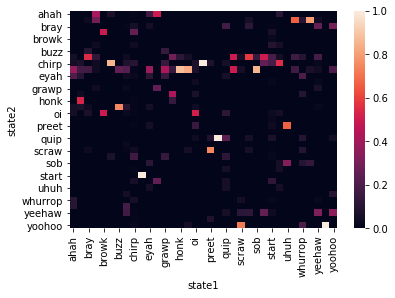

In [29]:
ax = sns.heatmap(transitions)

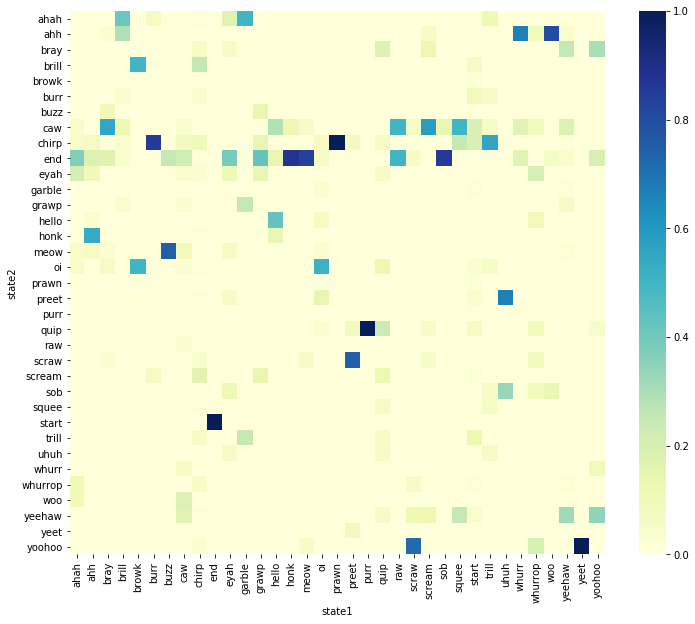

In [30]:
# formatting the heatmap

# make the heatmap bigger with figsize
# the limits are set by vmin=0 to vmax=1
# change the color with "ylgnbu"
# include all the tickmarks with  (xticklabels=True, yticklabels=True)
fig, ax = plt.subplots(figsize=(12,10))    
ax = sns.heatmap(transitions, vmin=0, vmax=1, cmap="YlGnBu",  xticklabels=True, yticklabels=True)


# OK I also want to make a graphic showing the process of transitioning between state1 and state2

This can be done using pySankey to create a sankey diagram which is basically a flowchart that might be used to visualize electrical current data, but I'm going to make it work for my duet transitions

In [31]:
# first I need to create a dataframe with state 1 and state 2 as the columns
# I will use twentytest as the subset
pairs = pd.DataFrame(window(twentytest), columns=['state1', 'state2'])

In [32]:
type(pairs)

pandas.core.frame.DataFrame

In [33]:
pairs.shape

(155, 2)

In [34]:
# I will need a third column for a sankey diagram, must add it to the "pairs" dataframe
pairs['values'] = 1
pairs

state1   state2  values
0      start    preet       1
1      preet    scraw       1
2      scraw   yoohoo       1
3     yoohoo   yeehaw       1
4     yeehaw      caw       1
5        caw      end       1
6        end    start       1
7      start     quip       1
8       quip    trill       1
9      trill    chirp       1
10     chirp    chirp       1
11     chirp   yoohoo       1
12    yoohoo     bray       1
13      bray      end       1
14       end    start       1
15     start  whurrop       1
16   whurrop    hello       1
17     hello    hello       1
18     hello      caw       1
19       caw      raw       1
20       raw      caw       1
21       caw      caw       1
22       caw      caw       1
23       caw      woo       1
24       woo      ahh       1
25       ahh     honk       1
26      honk      end       1
27       end    start       1
28     start      caw       1
29       caw      woo       1
..       ...      ...     ...
125       oi    hello       1
126    hello    hello       1
127    hello      end       1
128      end    start       1
129    start    chirp       1
130    chirp     meow       1
131     meow   yoohoo       1
132   yoohoo    whurr       1
133    whurr      end       1
134      end    start       1
135    start    chirp       1
136    chirp    chirp       1
137    chirp   yoohoo       1
138   yoohoo     bray       1
139     bray      caw       1
140      caw     meow       1
141     meow      end       1
142      end    start       1
143    start      caw       1
144      caw    chirp       1
145    chirp    chirp       1
146    chirp     ahah       1
147     ahah    chirp       1
148    chirp     bray       1
149     bray      caw       1
150      caw     eyah       1
151     eyah    preet       1
152    preet     quip       1
153     quip     eyah       1
154     eyah      end       1

[155 rows x 3 columns]

In [35]:
#importing some good plotting modules
import bokeh
import matplotlib
import holoviews as hv
from holoviews import dim, opts

hv.extension('matplotlib')
hv.output(fig='svg')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [36]:
edges = pairs
edges.head(5)

state1  state2  values
0   start   preet       1
1   preet   scraw       1
2   scraw  yoohoo       1
3  yoohoo  yeehaw       1
4  yeehaw     caw       1

In [37]:
# the error says that this diagram won't support cyclic graphs, 
# which means that the times where signals repeat is causing issues
# a cord diagram might be better

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
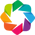

In [38]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)

In [39]:
chord = hv.Chord(pairs)
chord

:Chord   [state1,state2]   (values)

In [40]:
# customize the plot
chord.opts(
    opts.Chord(cmap='Colorblind', edge_cmap='Colorblind', edge_color=dim('state1').str(), 
               labels='name', node_color=dim('index').str()))
               

:Chord   [state1,state2]   (values)

# the above chord plot is for just twenty of the duets. I need to make a dataset of all of the transitions and make a chord diagram of that

In [41]:
allpairs = pd.DataFrame(window(all95), columns=['state1', 'state2'])

In [42]:
allpairs['values'] = 1
print(allpairs)

      state1   state2  values
0      start    preet       1
1      preet    scraw       1
2      scraw   yoohoo       1
3     yoohoo   yeehaw       1
4     yeehaw      caw       1
5        caw      end       1
6        end    start       1
7      start     quip       1
8       quip    trill       1
9      trill    chirp       1
10     chirp    chirp       1
11     chirp   yoohoo       1
12    yoohoo     bray       1
13      bray      end       1
14       end    start       1
15     start  whurrop       1
16   whurrop    hello       1
17     hello    hello       1
18     hello      caw       1
19       caw      raw       1
20       raw      caw       1
21       caw      caw       1
22       caw      caw       1
23       caw      woo       1
24       woo      ahh       1
25       ahh     honk       1
26      honk      end       1
27       end    start       1
28     start      caw       1
29       caw      woo       1
..       ...      ...     ...
713     eyah      end       1
714      e

In [43]:
wholechord = hv.Chord(allpairs)
wholechord

:Chord   [state1,state2]   (values)

In [44]:
wholechord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('state1').str(), 
               labels='name', node_color=dim('index').str()))

:Chord   [state1,state2]   (values)

# this looks good but I want to remove the pairs where "end" goes to "start" becuase that's a sequence that is an artifice of my needing a placeholder not an actual trend

In [45]:
#to do this I will search for all the state2 rows containing "start", it will delete those

newpairs = allpairs[allpairs.state2!= 'start']
newpairs

state1   state2  values
0      start    preet       1
1      preet    scraw       1
2      scraw   yoohoo       1
3     yoohoo   yeehaw       1
4     yeehaw      caw       1
5        caw      end       1
7      start     quip       1
8       quip    trill       1
9      trill    chirp       1
10     chirp    chirp       1
11     chirp   yoohoo       1
12    yoohoo     bray       1
13      bray      end       1
15     start  whurrop       1
16   whurrop    hello       1
17     hello    hello       1
18     hello      caw       1
19       caw      raw       1
20       raw      caw       1
21       caw      caw       1
22       caw      caw       1
23       caw      woo       1
24       woo      ahh       1
25       ahh     honk       1
26      honk      end       1
28     start      caw       1
29       caw      woo       1
30       woo      ahh       1
31       ahh     honk       1
32      honk      end       1
..       ...      ...     ...
709    trill    chirp       1
710    chirp    brill       1
711    brill    grawp       1
712    grawp     eyah       1
713     eyah      end       1
715    start     burr       1
716     burr    chirp       1
717    chirp    brill       1
718    brill      end       1
720    start   scream       1
721   scream      caw       1
722      caw   yeehaw       1
723   yeehaw   yeehaw       1
724   yeehaw     bray       1
725     bray      caw       1
726      caw     meow       1
727     meow      end       1
729    start    chirp       1
730    chirp    preet       1
731    preet    chirp       1
732    chirp    brill       1
733    brill      caw       1
734      caw     eyah       1
735     eyah      end       1
737    start    chirp       1
738    chirp    trill       1
739    trill      sob       1
740      sob      caw       1
741      caw      woo       1
742      woo      end       1

[649 rows x 3 columns]

In [46]:
 newchord = hv.Chord(newpairs)

In [47]:
newchord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('state1').str(), 
               labels='name', node_color=dim('index').str()))

:Chord   [state1,state2]   (values)

# this is the correct depiction of signal transitions

In [48]:
### I actually just realized how to make a sankey diagram, 
###I would have to rename the actual words in the state2 column
###so there would be no circularity
### I will rename them "chirp"--"chirp2"
unique_signals = set(all95)
unique_signals

{'ahah',
 'ahh',
 'bray',
 'brill',
 'browk',
 'burr',
 'buzz',
 'caw',
 'chirp',
 'end',
 'eyah',
 'garble',
 'grawp',
 'hello',
 'honk',
 'meow',
 'oi',
 'prawn',
 'preet',
 'purr',
 'quip',
 'raw',
 'scraw',
 'scream',
 'sob',
 'squee',
 'start',
 'trill',
 'uhuh',
 'whurr',
 'whurrop',
 'woo',
 'yeehaw',
 'yeet',
 'yoohoo'}

In [49]:
# I will first name the columns (I may have already but not sure)
# then I will test if the code works
df = pd.DataFrame(newpairs, columns = ['state1', 'state2', 'values'])
test = df.replace({'state2' : { 'preet':'preet2', 
                               'scraw':'scraw2',
                               'yoohoo': 'yoohoo2' }})

In [50]:
test.head(3)

state1   state2  values
0  start   preet2       1
1  preet   scraw2       1
2  scraw  yoohoo2       1

In [51]:
# I only have to do this for the signals that show repeats: caw, oi, hello, chirp, eyah
sankey_pairs = df.replace({'state2':{'yoohoo':'yoohoo2',
                                    'yeehaw':'yeehaw2',
                                     'quip':'quip2',
                                     'caw':'caw2',
                                     'hello':'hello2',
                                     'chuff':'chuff2',
                                     'buzz':'buzz2',
                                     'wop':'wop2',
                                     'scream':'scream2', 
                                     'chirp':'chirp2', 
                                     'brill':'brill2', 
                                     'burr':'burr2', 
                                     'eyah':'eyah2',
                                     'meow':'meow2',
                                     'oi':'oi2'}})

In [52]:
sankey_pairs.head(5)

state1   state2  values
0   start    preet       1
1   preet    scraw       1
2   scraw  yoohoo2       1
3  yoohoo  yeehaw2       1
4  yeehaw     caw2       1

In [53]:
# now I need to sum the rows that repeat
# i.e. the number of times start--preet2 occurs
#first name the columns
sankey_pairs = pd.DataFrame(sankey_pairs, columns = ['state1', 'state2', 'values'])
# then group them and sum the values, .reset index will preserve it
sankey_pairs = sankey_pairs.groupby(['state1','state2'])['values'].sum().reset_index()
sankey_pairs

state1   state2  values
0       ahah     caw2       1
1       ahah   chirp2       1
2       ahah      end       7
3       ahah    eyah2       4
4       ahah    meow2       1
5       ahah      oi2       1
6       ahah  whurrop       2
7       ahah      woo       2
8        ahh   chirp2       2
9        ahh      end       5
10       ahh    eyah2       3
11       ahh   hello2       1
12       ahh     honk      15
13       ahh    meow2       2
14      bray      ahh       1
15      bray    buzz2       3
16      bray     caw2      16
17      bray      end       5
18      bray    meow2       1
19      bray      oi2       2
20      bray    scraw       1
21     brill     ahah      10
22     brill      ahh       7
23     brill    burr2       1
24     brill     caw2       3
25     brill   chirp2       1
26     brill      end       1
27     brill    grawp       1
28     browk   brill2       1
29     browk      oi2       1
..       ...      ...     ...
163    whurr      ahh       4
164    whurr     caw2       1
165    whurr      end       1
166  whurrop      ahh       1
167  whurrop     caw2       1
168  whurrop    eyah2       2
169  whurrop   hello2       1
170  whurrop    quip2       1
171  whurrop    scraw       1
172  whurrop      sob       1
173  whurrop  yoohoo2       2
174      woo      ahh      12
175      woo      end       1
176      woo      sob       2
177   yeehaw      ahh       2
178   yeehaw     bray      11
179   yeehaw     caw2       8
180   yeehaw   chirp2       1
181   yeehaw      end       2
182   yeehaw   garble       1
183   yeehaw    grawp       3
184   yeehaw    meow2       1
185   yeehaw  whurrop       1
186   yeehaw  yeehaw2      14
187     yeet  yoohoo2       2
188   yoohoo     bray       6
189   yoohoo      end       4
190   yoohoo    quip2       1
191   yoohoo    whurr       2
192   yoohoo  yeehaw2       7

[193 rows x 3 columns]

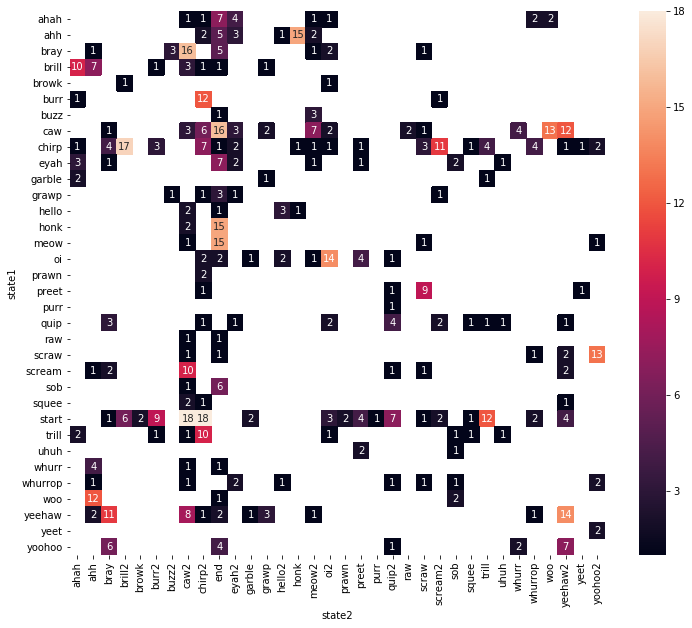

In [54]:
heatmap = sankey_pairs.pivot("state1", "state2", "values")
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(heatmap,  annot=True)

In [55]:
edges= sankey_pairs
sankey = hv.Sankey(edges, label='Energy Diagram')


RecursionError: Sankey diagrams only support acyclic graphs.

In [ ]:
from pylab import *
from scipy import *

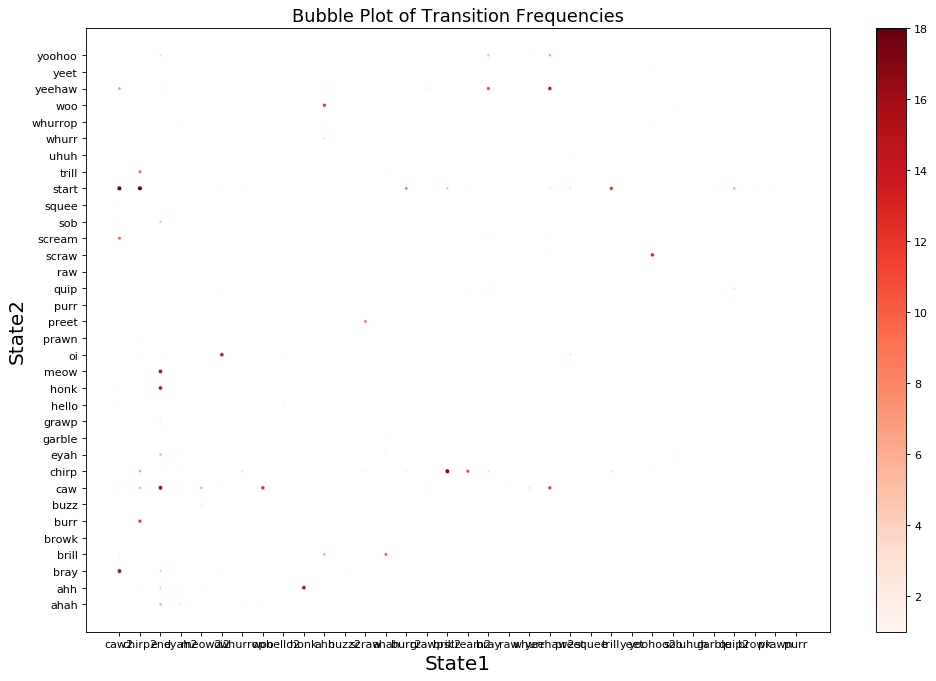

In [56]:
# Plot
fig = plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('state2', 'state1', data=sankey_pairs, s='values', c='values', cmap='Reds', edgecolors='white', linewidths=.5)
plt.title("Bubble Plot of Transition Frequencies", fontsize=16)
plt.xlabel('State1', fontsize=18)
plt.ylabel('State2', fontsize=18)
plt.colorbar()
plt.show()     

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
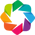

KeyError: nan

In [63]:

import holoviews as hv
from holoviews import opts, renderer, render
from holoviews import dim
import pandas as pd
hv.extension('bokeh')

df = acyclic

sankey = hv.Sankey(df)

sankey.opts(label_position='right', edge_color='state1', node_color='state2', cmap='flag', show_values=False, labels=dim('state2')+' foo bar baz '+dim('state1'))
sankey

In [60]:
acyclic= sankey_pairs[sankey_pairs!= 'yeet']


In [61]:
df = acyclic

sankey = hv.Sankey(df)

sankey.opts(label_position='right', edge_color='state1', node_color='state2', cmap='flag', show_values=False, labels=dim('state2')+' foo bar baz '+dim('state1'))
sankey

KeyError: nan